<a href="https://colab.research.google.com/github/eraj256/Datascience_project-/blob/main/Student%20Placement%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem:
This dataset contains synthetic information for 1000 students, focusing on academic performance and placement outcomes


# import libraries


In [ ]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt


# upload dataset


In [ ]:
dataset=pd.read_csv('/content/Placement.csv')
dataset.shape

(1000, 5)

In [ ]:
dataset.head(2)

,Student_ID,CGPA,Internships,Placed,Salary (INR LPA)
0,1,7.90,3,Yes,17.63
1,2,7.39,0,Yes,28.37


# Exploratory data analysis (EDA)

In [ ]:
dataset.isnull().sum()

,0
Student_ID,0
CGPA,0
Internships,0
Placed,0
Salary (INR LPA),0


In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
dataset.columns

Index(['Student_ID', 'CGPA', 'Internships', 'Placed', 'Salary (INR LPA)'], dtype='object')

In [ ]:
dataset['Placed']=dataset['Placed'].map({'Yes':1,'No':0})
dataset.head()

,Student_ID,CGPA,Internships,Placed,Salary (INR LPA)
0,1,7.90,3,1,17.63
1,2,7.39,0,1,28.37
2,3,8.02,2,1,8.95
3,4,8.72,4,1,22.59
4,5,7.31,2,1,19.67


In [ ]:
dataset.describe()

,Student_ID,CGPA,Internships,Placed,Salary (INR LPA)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,7.515560,2.045000,0.690000,11.795580
std,288.819436,0.783422,1.424431,0.462725,10.105559
min,1.000000,4.910000,0.000000,0.000000,0.000000
25%,250.750000,6.980000,1.000000,0.000000,0.000000
50%,500.500000,7.520000,2.000000,1.000000,11.715000
75%,750.250000,8.020000,3.000000,1.000000,20.935000
max,1000.000000,10.580000,4.000000,1.000000,29.900000


In [ ]:
dataset.corr()

,Student_ID,CGPA,Internships,Placed,Salary (INR LPA)
Student_ID,1.000000,0.035674,-0.013422,0.014164,-0.000513
CGPA,0.035674,1.000000,-0.027987,-0.050274,-0.044499
Internships,-0.013422,-0.027987,1.000000,0.012074,0.002298
Placed,0.014164,-0.050274,0.012074,1.000000,0.782767
Salary (INR LPA),-0.000513,-0.044499,0.002298,0.782767,1.000000


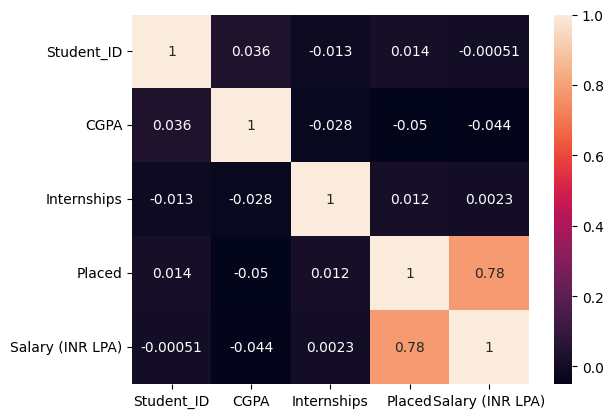

In [ ]:
heapmap=snb.heatmap(dataset.corr(),annot=True)

In [ ]:
dataset.groupby(["Internships", "Placed"]).size().unstack()


Placed,0,1
Internships,,
0,56,135
1,75,136
2,52,116
3,61,161
4,66,142


In [ ]:
# Dataset load
df = pd.read_csv("/content/Placement.csv")

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in ["CGPA", "Internships", "Salary (INR LPA)"]:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)

print(df.shape)   # new dataset size after removing outliers


(992, 5)


# preprocessing


In [ ]:
df.drop('Student_ID',axis=1,inplace=True)

In [ ]:
df.shape

(992, 4)

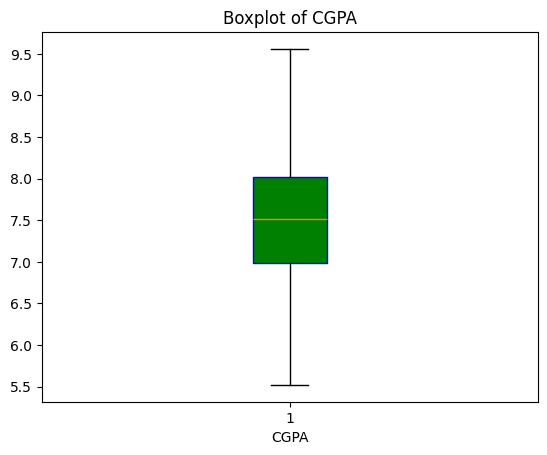

In [86]:
plt.boxplot(df["CGPA"],
            patch_artist=True,   # Fill karne ke liye
            boxprops=dict(facecolor="green", color="blue"))

plt.title("Boxplot of CGPA")
plt.xlabel("CGPA")
plt.show()


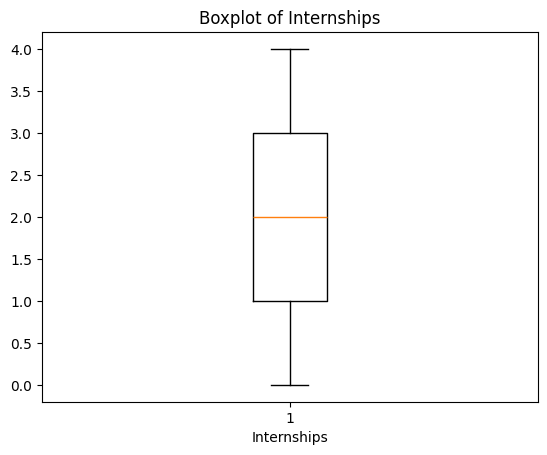

In [ ]:
plt.boxplot(df["Internships"])
plt.title("Boxplot of Internships")
plt.xlabel("Internships")
plt.show()

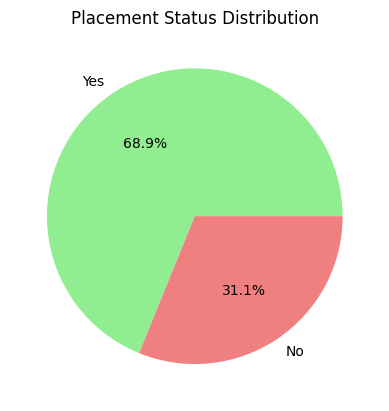

In [ ]:
df["Placed"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightgreen", "lightcoral"])
plt.title("Placement Status Distribution")
plt.ylabel("")
plt.show()

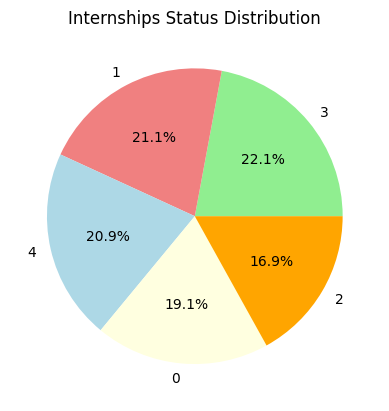

In [78]:
df["Internships"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightgreen", "lightcoral","lightblue","lightyellow","orange"])
plt.title("Internships Status Distribution")
plt.ylabel("")
plt.show()

#Data Modeling


In [ ]:
x=df[['CGPA','Internships']]
y=df['Placed']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6532663316582915
Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00        69
         Yes       0.65      1.00      0.79       130

    accuracy                           0.65       199
   macro avg       0.33      0.50      0.40       199
weighted avg       0.43      0.65      0.52       199



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_res, y_res)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5728643216080402

Classification Report:
               precision    recall  f1-score   support

          No       0.42      0.59      0.49        69
         Yes       0.72      0.56      0.63       130

    accuracy                           0.57       199
   macro avg       0.57      0.58      0.56       199
weighted avg       0.62      0.57      0.58       199



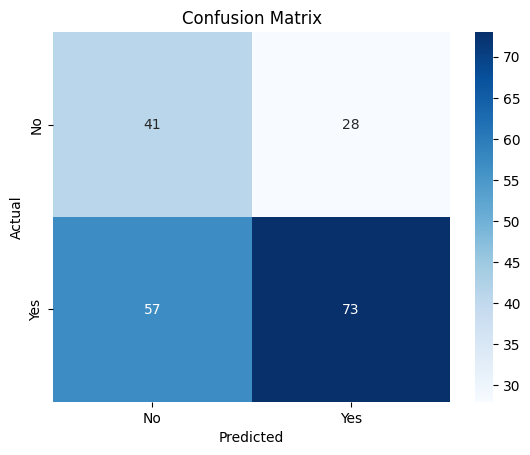

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Conclusion

📊 Total Predictions = 41 + 28 + 57 + 73 = 199

📊 Correct Predictions = 41 + 73 = 114

📊 Wrong Predictions = 28 + 57 = 85

🔹 Before SMOTE
Dataset is imbalanced (e.g., more "Yes", fewer "No").
Model becomes biased toward the majority class.
Accuracy may look high, but minority class gets ignored (low recall).

🔹 After SMOTE
Training data becomes balanced (Yes ≈ No).
Model gives equal importance to both classes.
Recall improves (better predictions on the minority class).
But test data is still imbalanced, so results may not look perfect.

👉 SMOTE mainly ensures fair training, while actual accuracy/performance depends on further tuning.

## Simple Summary of Student Placement Analysis

This project looked at information about 1000 students to understand what helps them get placed in jobs after their studies.

We used data like their grades (CGPA), how many internships they did, and whether they got a job placement or not.

**What we found:**

*   We checked the data to make sure it was clean and accurate.
*   We saw that most students in this dataset did get placed.
*   We built a simple model to try and predict if a student would get placed based on their grades and internships.
*   Because there were more students who got placed than those who didn't, we used a technique called SMOTE to make sure our model didn't ignore the students who didn't get placed. This helps the model be fairer.
*   We checked how well our model worked. It can predict placements to some extent, but there's always room to make it better.

**In simple terms:**

We used student grades and internships to predict if they would get a job. We made sure our prediction tool was fair, even though more students in the data got jobs than didn't. The tool works reasonably well, but it's not perfect.